In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). I used a _scatter plot_ to depict the data.

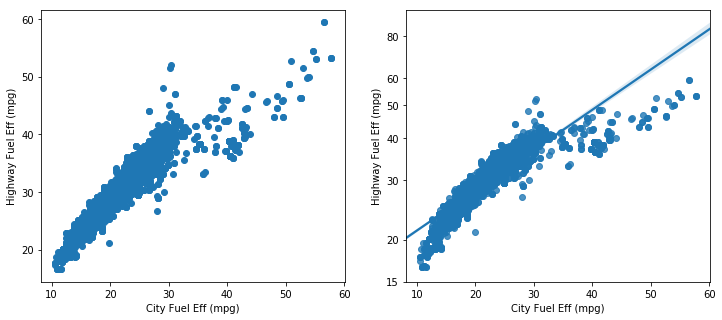

In [23]:
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
plt.scatter(data = fuel_econ, x = 'city', y = 'highway');
plt.xlabel('City Fuel Eff (mpg)')
plt.ylabel('Highway Fuel Eff (mpg)')

plt.subplot(1,2,2)
def log_trans (x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

sb.regplot(fuel_econ['city'], fuel_econ['highway'].apply(log_trans))
tick_locs = [15, 20, 30, 40, 50, 60, 80]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xlabel('City Fuel Eff (mpg)')
plt.ylabel('Highway Fuel Eff (mpg)');

Text(0,0.5,'Highway Fuel Eff (mpg)')

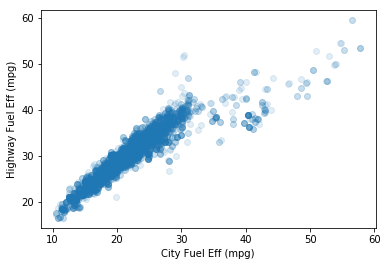

In [24]:
# use transprancy by adding alpha parameter
plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 1/8)
plt.xlabel('City Fuel Eff (mpg)')
plt.ylabel('Highway Fuel Eff (mpg)')

**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? I used a heat map to depict the data showing relationship of the jitter and 

In [13]:
fuel_econ.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [14]:
fuel_econ.co2.describe()

count    3929.000000
mean      376.564266
std        92.338892
min        29.000000
25%       315.000000
50%       369.000000
75%       429.000000
max       692.000000
Name: co2, dtype: float64

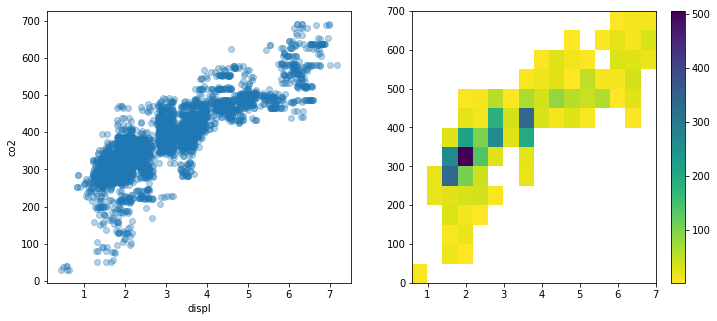

In [21]:
plt.figure(figsize = [12,5])

#left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1,2,1)
sb.regplot (data = fuel_econ, x = 'displ', y = 'co2', fit_reg = False, x_jitter = 0.2, y_jitter = 0.2,
           scatter_kws = {'alpha' : 1/3})
plt.xlabel('Displacement')
plt.ylabel('CO2')

#right plot: heat map with bin edges between values
plt.subplot(1,2,2)
bins_x = np.arange(0.6, 7+0.4, 0.4)
bins_y = np.arange(0, 692+50, 50)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('Displacement')
plt.ylabel('CO2')
plt.colorbar();